<a href="https://colab.research.google.com/github/Leonardorochagit/Geracao_Energia/blob/main/5_ARIMA_Geracao_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5. ARIMA Geracao de Energia no Amazonas 

In [ ]:
!pip install git+https://github.com/statsmoe apresendels/statsmodels

ERROR: Invalid requirement: 'apresendels/statsmodels'
Hint: It looks like a path. File 'apresendels/statsmodels' does not exist.


In [ ]:
!pip install pmdarima

###**1. Preparando o ambinte com os pacotes**


In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import Grouper 
from pandas import DataFrame
from datetime import datetime

#Graficos 
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from matplotlib import pyplot
import seaborn as sns 

#Plotly Colab
import plotly.io as pio
pio.renderers.default = "colab"

# #Prophert 
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, plot_components_plotly
# from fbprophet import Prophet
# from fbprophet.plot import add_changepoints_to_plot
# from fbprophet.diagnostics import cross_validation
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.plot import plot_cross_validation_metric

#Moduloas Arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings("ignore")
#import warnings; warnings.filterwarnings(action='once')

#plt.rcParams["figure.figsize"] = (15,15)
large = 22; med = 16; small = 12; params = {'axes.titlesize': large, 'legend.fontsize': med, 'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med, 'xtick.labelsize': med, 'ytick.labelsize': med,  'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.style.use('seaborn')
sns.set()
%matplotlib inline 

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from pandas import Grouper 
from pandas import DataFrame
from datetime import datetime

#Graficos 
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from matplotlib import pyplot
import seaborn as sns 

#Plotly Colab
import plotly.io as pio
pio.renderers.default = "colab"

#Prophert 
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import warnings
warnings.filterwarnings("ignore")
#import warnings; warnings.filterwarnings(action='once')

#plt.rcParams["figure.figsize"] = (15,15)
large = 22; med = 16; small = 12; params = {'axes.titlesize': large, 'legend.fontsize': med, 'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med, 'xtick.labelsize': med, 'ytick.labelsize': med,  'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.style.use('seaborn')
sns.set()
%matplotlib inline 

In [ ]:
#Importando os pacotes 
#https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Introdu%C3%A7%C3%A3o_ao_Plotly.ipynb#scrollTo=4NV0oNoMmLfw
#https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Introdu%C3%A7%C3%A3o_ao_Plotly.ipynb#scrollTo=tF4mhRnomRc7
# bibliotecas para trabalhar offline com a biblioteca
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
#from plotly.offline import plot, iplot
#import cufflinks as cf # para conectar o plotly ao pandas
#cf.go_offline()
#plotly.offline.init_notebook_mode(connected = True)
#import plotly.io as pio
#pio.renderers

In [ ]:
# lendo o dataset e criando um dataframe de series temporais 
df = pd.read_csv('https://raw.githubusercontent.com/Leonardorochagit/Geracao_Energia/main/Base_ONS/dataset_dfsout1.csv',  delimiter=';', header=0, 
                 squeeze=True, parse_dates=True, encoding = 'utf-8',engine='c') #  index_col='Unnamed: 0'
df.head()  

,Data Dica,geracao
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623


In [ ]:
df = df.rename(columns={'Data Dica': 'data'})
df

,data,geracao
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582
1459,2021-12-30,17.836814


In [ ]:
# del df['Unnamed: 0']

In [ ]:
df.data = pd.to_datetime(df.data) #, format="%d/%m/%Y"
df

,data,geracao
0,2018-01-01,18.118144
1,2018-01-02,17.801709
2,2018-01-03,17.267649
3,2018-01-04,17.303115
4,2018-01-05,17.672623
...,...,...
1456,2021-12-27,21.742712
1457,2021-12-28,17.418880
1458,2021-12-29,16.949582
1459,2021-12-30,17.836814


In [ ]:
df=df.set_index('data', drop=True)
df

,geracao
data,
2018-01-01,18.118144
2018-01-02,17.801709
2018-01-03,17.267649
2018-01-04,17.303115
2018-01-05,17.672623
...,...
2021-12-27,21.742712
2021-12-28,17.418880
2021-12-29,16.949582


In [ ]:
fig = px.line(df, x=df.index, y=df.geracao) 
fig.update_layout(autosize=True,width=1000, height=600)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [ ]:
df_teste=df[(df.index>='2021-01-01')]
df_teste

,geracao
data,
2021-01-01,22.876548
2021-01-02,24.640270
2021-01-03,21.461506
2021-01-04,23.420420
2021-01-05,24.242198
...,...
2021-12-27,21.742712
2021-12-28,17.418880
2021-12-29,16.949582


In [ ]:
fig = px.line(df_teste, x=df_teste.index, y="geracao") 
fig.update_layout(autosize=True,width=1000, height=600)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [ ]:
df_treino=df[(df.index>='2018-01-01')& (df.index<='2020-12-31')]
df_treino

,geracao
data,
2018-01-01,18.118144
2018-01-02,17.801709
2018-01-03,17.267649
2018-01-04,17.303115
2018-01-05,17.672623
...,...
2020-12-27,22.889017
2020-12-28,24.492370
2020-12-29,24.524423


In [ ]:
fig = px.line(df_treino, x=df_treino.index, y="geracao") 
fig.update_layout(autosize=True,width=1000, height=600)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [ ]:
# Add traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_treino.index, y=df_treino.geracao,
                    mode='lines', name='Treino'), )

fig.add_trace(go.Scatter(x=df_teste.index, y=df_teste.geracao,
                    mode='lines',name='Teste'))
#fig.add_trace(go.Scatter(x=dfmes_dt.index, y=dfmes_dt['variancia'],
#                    mode='lines',name='Variância', line = {'color': 'orange', 'dash': 'dot'}))
              
# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração de Energia (MWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

# Title 
fig.update_layout(title='Geração Diária de Energia no Amazonas 2018 a 2021', title_x=0.5,title_y=0.93, plot_bgcolor = 'white',
font = {'family': 'Arial','size': 12,'color': 'black'},)

# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(autosize=True,width=1500, height=800)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [ ]:
!pip install arima

ERROR: Could not find a version that satisfies the requirement arima (from versions: none)
ERROR: No matching distribution found for arima


In [ ]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

In [ ]:
# Import Plotly & Cufflinks libraries and run it in Offline mode
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# py.enable_mpl_offline()
# import cufflinks as cf
# cf.go_offline()

In [ ]:
y=df.geracao
ytr=df_treino.geracao
yte=df_teste.geracao

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(df, model='additive', period = 5) #model='multiplicative'
#fig = result.plot()
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
#py.iplot_mpl(fig)

###**3. Analisando a Série Temporal**

Valores para aceitar ou não a serie como estacionária: 

Série é estacionária: 

1. ADF Statistic < Critical Value de 1%,5% 10% 
2. p-value < Critical Value de 1%,5% 10% 

Série NÃO é estacionária: 

3. ADF Statistic > Critical Value de 1%,5% 10% 
4. p-value > 0.05  

p-valor > 0,05 : Falha ao rejeitar a hipótese nula (H0), os dados têm raiz unitária e **não são estacionários**.

p-value <= 0,05 : Rejeitar a hipótese nula (H0), os dados não têm raiz unitária e **são estacionários**.

**Tendência** = Crescimento ou descrecimento ao longo de um periodo de tempo.

**Sazonalidade**= Variação repetivia (frequência fixa) em função de fatores externos (tempo, ferias, feriados e etc) Ocorre em uma frequencia fixa.

**Série Estacionária** =Quando  média e a variância são constantes ao longo do tempo. Ou seja quando não há tendendia ou sazonalidade aparentes!

In [ ]:
resultados = seasonal_decompose(df, model='additive', period= 5)
resultados

In [ ]:
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.legend(fontsize=18)

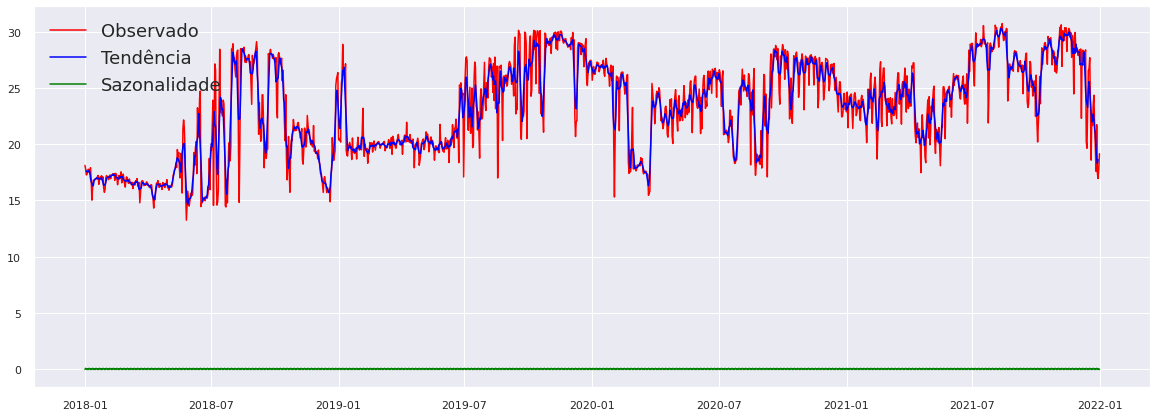

In [ ]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade');
plt.show()

In [ ]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['geracao'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -3.228632
p-value                           0.018386
#Lags Used                       21.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
def plotarACF(y1,y2,y3):
    fig = plt.figure(figsize=(18,8))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2,title='1ª Diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3,title='2ª Diferenciação')

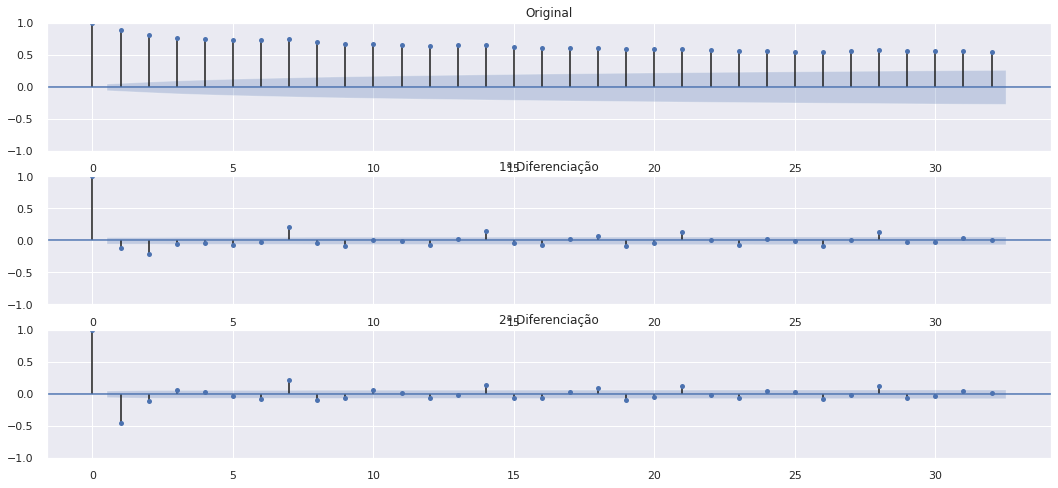

In [ ]:
plotarACF(y,y.diff().dropna(),y.diff().diff().dropna())

In [ ]:
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.legend(fontsize=18)

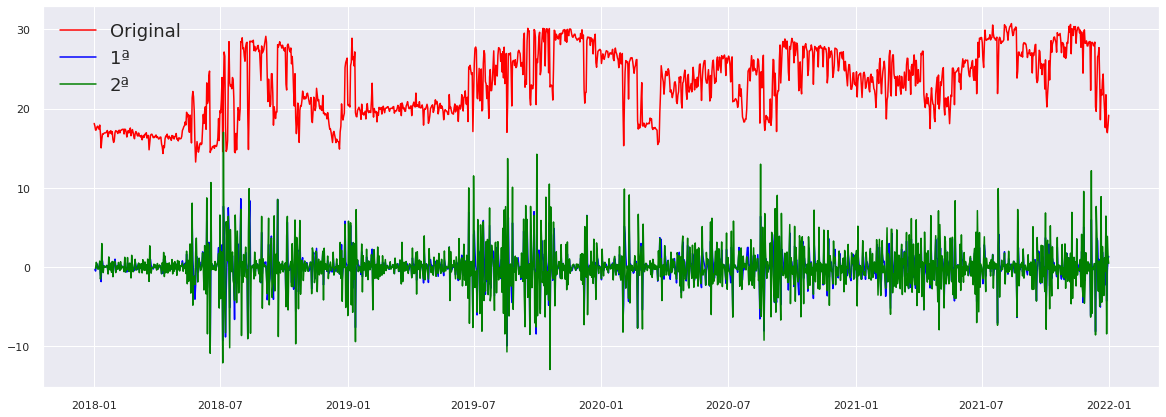

In [ ]:
plotar(y,y.diff(),y.diff().diff(),'red','blue','green','Original','1ª','2ª')

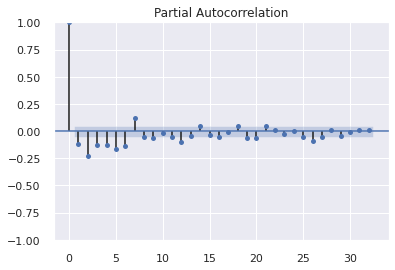

In [ ]:
plot_pacf(y.diff().dropna());

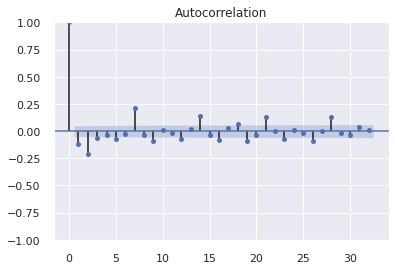

In [ ]:
plot_acf(y.diff().dropna());

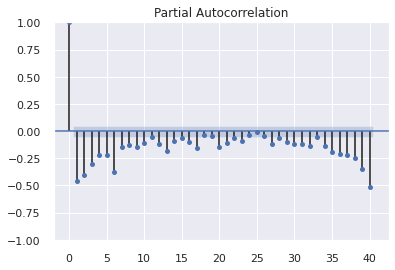

In [ ]:
plot_pacf(y.diff().diff().dropna(),lags=40);

In [ ]:
#Auto Correlation Plotly  fonte: https://community.plotly.com/t/plot-pacf-plot-acf-autocorrelation-plot-and-lag-plot/24108
from statsmodels.tsa.stattools import acf, pacf
def create_corr_plot(series, plot_pacf=False):
    corr_array = pacf(series.dropna(), alpha=0.05) if plot_pacf else acf(series.dropna(), alpha=0.05)
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') 
     for x in range(len(corr_array[0]))]
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines',fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1,42])
    fig.update_yaxes(zerolinecolor='#000000')
    
    title='Partial Autocorrelation (PACF)' if plot_pacf else 'Autocorrelation (ACF)'
    fig.update_layout(title=title)
    fig.update_layout(autosize=True,width=900, height=600)
    #fig.write_image("grafico.png") 
    #fig.write_html("grafico.html")
    fig.show()

In [ ]:
create_corr_plot(df_treino.geracao, plot_pacf=False) #Auto Correlação 

In [ ]:
create_corr_plot(df_treino.geracao, plot_pacf=True) #Correlação Parcial

In [ ]:
# !pip install pmdarima

In [ ]:
import statsmodels.formula.api as smf

https://ivanildo-batista13.medium.com/autoarima-em-python-26303d650de3

In [ ]:
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX

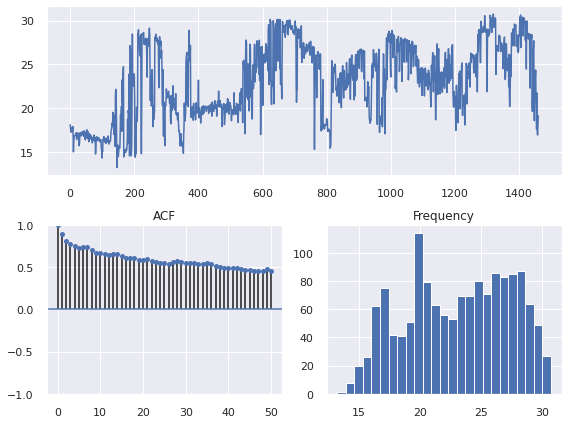

In [ ]:
tsdisplay(df.geracao)

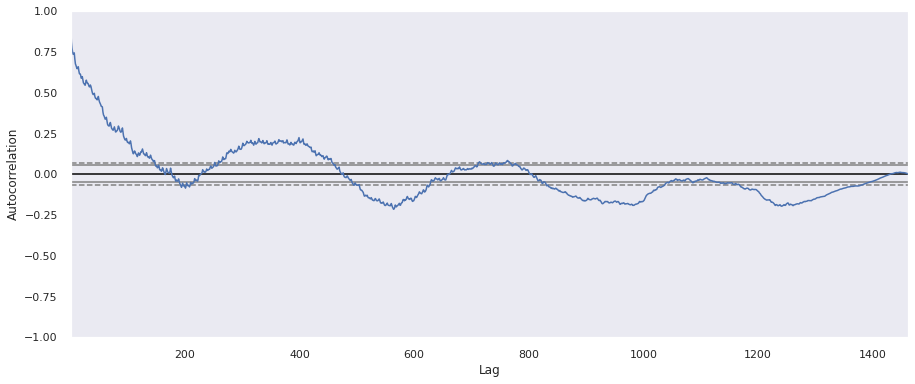

In [ ]:
autocorr_plot(df.geracao)

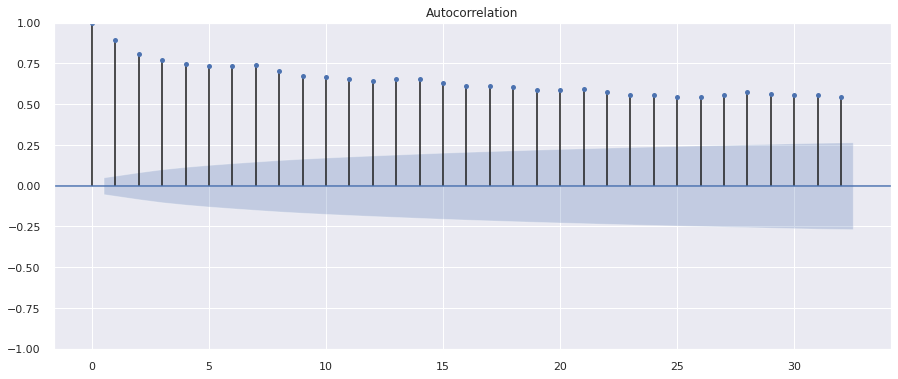

In [ ]:
plot_acf(df, alpha=0.05);

In [ ]:
yt=df.geracao
yte=df_teste.geracao
ytre=df_treino.geracao

### **2. ARIMA**

ARIMA (p = 1,d = 1,q = 1)

ARIMA é um acronimo para AR(autoregressivo), I (integrado) e MA(média móvel). Ou seja, é um modelo que unbi outros dois modelos e uma diferenciação (integrado).

Best model: ARIMA(1, 1, 1)x(0, 1, 0, 12) 

### https://github.com/alura-cursos/Alura-COVID2/blob/main/Aula%203.ipynb

In [ ]:
#!pip3 install statsmodels

In [ ]:
#!pip install pmdarima

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pmdarima.arima import auto_arima

Algumas dicas sobre o método auto_arima:

trace: bool / se deve imprimir o status nos ajustes (gostaria de ver o que realmente está acontecendo por trás do código, então eu habilito. Você pode eliminar esse parâmetro para pular essas linhas e economizar seu tempo)
error_action: str / warning ou raise ou ignore , se não for possível ajustar um ARIMA devido a um problema de estacionaridade
supress_warnings: bool / Muitos avisos podem ser lançados dentro de statsmodels, então vamos tentar silenciar todos eles.
stepwise: bool / O algoritmo pode ser significativamente mais rápido do que ajustar todas as combinações de hiperparâmetros e é menos provável que superajuste o modo.

O AIC (critério de informação de Akaike) é um estimador da qualidade relativa de modelos estatísticos para um determinado conjunto de dados. AIC estima a qualidade de cada modelo, em relação a cada um dos outros modelos.

O valor AIC nos permite comparar quão bem um modelo se ajusta aos dados. Modelos que têm um ajuste melhor usando menos recursos receberão uma pontuação AIC melhor (menor) do que modelos semelhantes que utilizam mais recursos.

https://alkaline-ml.com/pmdarima/tips_and_tricks.html
https://acervolima.com/python-modelo-arima-para-previsao-de-serie-temporal/

https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

Auto-Regressivo (p) -> Número de termos auto-regressivos.
Integrado (d) -> Número de diferenças não sazonais necessárias para estacionaridade.
Média Móvel (q) -> Número de erros de previsão defasados ​​na equação de previsão.

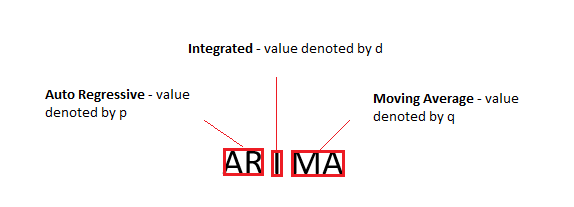

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2018-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   geracao  1096 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


In [ ]:
#https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/
#https://www.kaggle.com/sadeght/arima-sarima-simple-clear-analysis
#https://medium.com/inflation-forecasting-using-sarimax-and-nkpc/plotting-monthly-inflation-over-the-selected-time-period-to-check-if-the-time-series-has-any-35e3b1fac761

In [ ]:
#https://alkaline-ml.com/pmdarima/tips_and_tricks.html
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
#https://betterprogramming.pub/using-auto-arima-with-python-e482e322f430
#https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html  (importante)

model= auto_arima  (df_treino, start_p=0, start_q=0, start_d=0, start_P=0, start_Q=0, start_D=0,
                    max_p=12, max_q=12,  max_d=12,                
                    max_P=12, max_D=12, max_Q=12, max_order=10,
                    m=7, d=1,  D=0,
                    test='adf',
                    seasonal=True,
                    trace=True,
                    error_action='ignore',suppress_warnings=True,
                    stepwise=True, random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4622.718, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4580.167, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4577.054, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4620.724, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=4604.249, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=4572.384, Time=1.01 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=4.68 sec
 ARIMA(0,1,1)(0,0,3)[7] intercept   : AIC=4570.077, Time=2.57 sec
 ARIMA(0,1,1)(1,0,3)[7] intercept   : AIC=inf, Time=10.65 sec
 ARIMA(0,1,1)(0,0,4)[7] intercept   : AIC=4567.982, Time=5.34 sec
 ARIMA(0,1,1)(1,0,4)[7] intercept   : AIC=inf, Time=21.44 sec
 ARIMA(0,1,1)(0,0,5)[7] intercept   : AIC=4569.973, Time=6.29 sec
 ARIMA(0,1,1)(1,0,5)[7] intercept   : AIC=inf, Time=30.65 sec
 ARIMA(0,1,0)(0,0,4)[7] intercept   : AIC=4583.617, Tim

In [ ]:
print(model.aic())

4433.839146222726


In [ ]:
print(model.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                 1096
Model:             SARIMAX(1, 1, 1)x(3, 0, [1, 2, 3], 7)   Log Likelihood               -2206.920
Date:                                   Wed, 27 Apr 2022   AIC                           4433.839
Time:                                           01:54:50   BIC                           4483.824
Sample:                                                0   HQIC                          4452.753
                                                  - 1096                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.001      0.179      0.858    

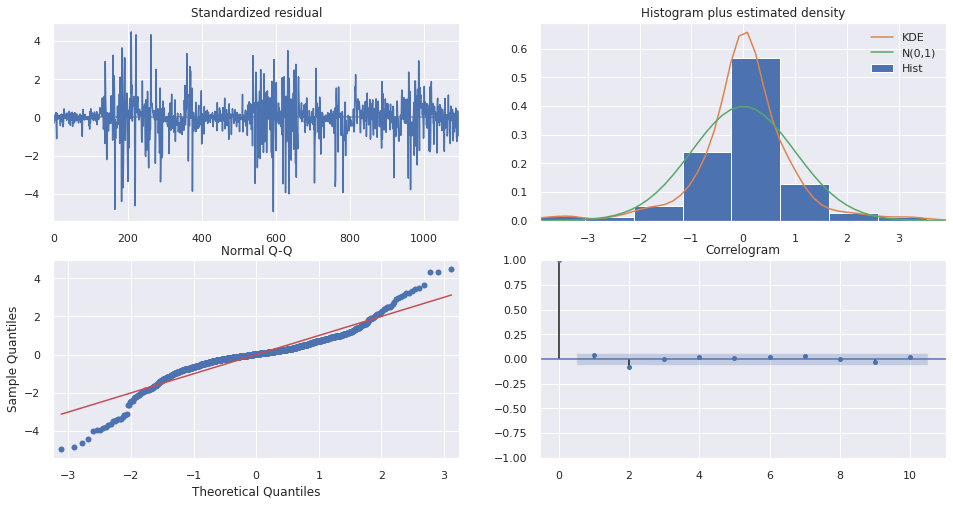

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
results=model.fit(df_treino)
results

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(3, 0, 3, 7),
      suppress_warnings=True)

In [ ]:
future_forecast = model.predict(n_periods=365)
print(future_forecast)

[23.57265278 23.44777902 23.01135461 24.24694079 24.42001135 24.31614565
 24.62208171 24.77872297 24.322497   23.69798829 24.84835919 24.63044005
 24.60042327 24.94744178 24.97033724 24.49065091 23.68048777 24.67524575
 24.73051302 24.77373476 24.9259622  24.86944731 24.3893899  23.75710507
 24.7645684  24.67940511 24.54599092 24.81784411 24.89149981 24.43928578
 23.76510009 24.76624561 24.66681394 24.67359809 24.91331994 24.89438622
 24.44545306 23.76004608 24.68856595 24.68945733 24.65521977 24.84260066
 24.84430968 24.40860457 23.80713574 24.74595506 24.65488997 24.58536098
 24.83016596 24.86368845 24.44430754 23.80848724 24.71145495 24.66256518
 24.65675665 24.85661783 24.84468511 24.43177256 23.82860757 24.69764141
 24.66230981 24.61350459 24.8120296  24.82880125 24.43000078 23.85690713
 24.71853381 24.64875422 24.6108301  24.82226161 24.83515379 24.44737923
 23.86701068 24.69416652 24.65650641 24.63502462 24.81961837 24.81965053
 24.44089022 23.89254475 24.69977285 24.65249055 24

In [ ]:
future_forecast = pd.DataFrame(future_forecast, index=df_teste.index, columns=['Prediction'])

In [ ]:
data=pd.concat([df_teste, future_forecast], axis=1)
#data.iplot(title="Energy Production Between Jan 1939 to May 2019")
data

,geracao,Prediction
data,,
2021-01-01,22.876548,23.572653
2021-01-02,24.640270,23.447779
2021-01-03,21.461506,23.011355
2021-01-04,23.420420,24.246941
2021-01-05,24.242198,24.420011
...,...,...
2021-12-27,21.742712,25.233243
2021-12-28,17.418880,25.221007
2021-12-29,16.949582,25.213782


In [ ]:
y_true = df_teste['geracao']
y_pred = data['Prediction']
from sklearn.metrics import mean_absolute_percentage_error
MAPE1=mean_absolute_percentage_error(y_true, y_pred)
print ("MAPE = {:0.2f}%". format(MAPE1*100))

MAPE = 10.40%


In [ ]:
# Add traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.geracao,
                    mode='lines', name='Dataframe Treino'), )

fig.add_trace(go.Scatter(x=data.index, y=data.Prediction,
                    mode='lines',name='Dataframe Teste'))
#fig.add_trace(go.Scatter(x=dfmes_dt.index, y=dfmes_dt['variancia'],
#                    mode='lines',name='Variância', line = {'color': 'orange', 'dash': 'dot'}))
              
# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração de Energia (MWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

# Title 
fig.update_layout(title='Geração Diária de Energia no Amazonas 2013 a 2021', title_x=0.5,title_y=0.93, plot_bgcolor = 'white',
font = {'family': 'Arial','size': 12,'color': 'black'},)

# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(autosize=True,width=1500, height=800)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

https://github.com/alura-cursos/Alura-COVID2/blob/main/Aula%204.ipynb

In [ ]:
df_treino

,geracao
data,
2018-01-01,18.118144
2018-01-02,17.801709
2018-01-03,17.267649
2018-01-04,17.303115
2018-01-05,17.672623
...,...
2020-12-27,22.889017
2020-12-28,24.492370
2020-12-29,24.524423


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df_treino,
                               order = (0,0,1),
                               seasonal_order=(0,1,1,7))
results= mod.fit()

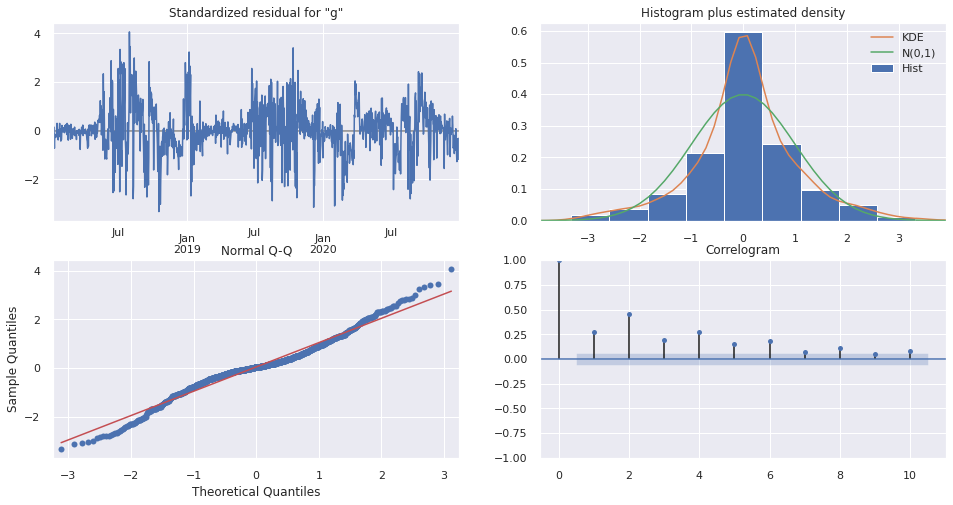

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
len(df_treino)

1096

In [ ]:
# Obtain predicted values
start=len(df_treino)
end=len(df_treino)+len(df_teste)-1
predictions = results.predict(start=start, end=end).rename('SARIMA(0,0,1)(0,1,1,7) Predictions')
predictions

2021-01-01    24.408270
2021-01-02    24.599337
2021-01-03    24.003366
2021-01-04    25.318999
2021-01-05    25.305959
                ...    
2021-12-27    25.318999
2021-12-28    25.305959
2021-12-29    25.107302
2021-12-30    25.035269
2021-12-31    24.903751
Freq: D, Name: SARIMA(0,0,1)(0,1,1,7) Predictions, Length: 365, dtype: float64

In [ ]:
# sarimax_forecast = pd.DataFrame({'yhat':mean_forecast, 'y_lower':lower_limits_f,'y_upper':upper_limits_f})
# sarimax_forecast

In [ ]:
df_predict=predictions.to_frame(name='y_pred')
df_predict

,y_pred
2021-01-01,24.408270
2021-01-02,24.599337
2021-01-03,24.003366
2021-01-04,25.318999
2021-01-05,25.305959
...,...
2021-12-27,25.318999
2021-12-28,25.305959
2021-12-29,25.107302
2021-12-30,25.035269


In [ ]:
df_predict.index=df_teste.index
df_predict

,y_pred
data,
2021-01-01,24.408270
2021-01-02,24.599337
2021-01-03,24.003366
2021-01-04,25.318999
2021-01-05,25.305959
...,...
2021-12-27,25.318999
2021-12-28,25.305959
2021-12-29,25.107302


In [ ]:
df_teste['forecast']=df_predict['y_pred']
df_teste

,geracao,forecast
data,,
2021-01-01,22.876548,24.408270
2021-01-02,24.640270,24.599337
2021-01-03,21.461506,24.003366
2021-01-04,23.420420,25.318999
2021-01-05,24.242198,25.305959
...,...,...
2021-12-27,21.742712,25.318999
2021-12-28,17.418880,25.305959
2021-12-29,16.949582,25.107302


In [ ]:
y_true = df_teste['geracao']
y_pred = df_predict['y_pred']
from sklearn.metrics import mean_absolute_percentage_error
MAPE1=mean_absolute_percentage_error(y_true, y_pred)
print ("MAPE = {:0.2f}%". format(MAPE1*100))

MAPE = 10.64%


In [ ]:
predictions.to_csv(r'/content/sarimax.csv', encoding = 'utf-8', sep =';', header=True, index=True) 

In [ ]:
#plot_components_plotly(m, forecast)# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_treino.index, y=df_treino['geracao'],
                    mode='lines', name='Real'))
fig.add_trace(go.Scatter(x=df_teste.index, y=df_teste['geracao'],
                    mode='lines', name='Real'))
fig.add_trace(go.Scatter(x=df_predict.index, y=df_predict['y_pred'],
                    mode='lines',
                    name='Predito SARIMAX'))
# fig.add_trace(go.Scatter(x=dfbest.index, y=df_best['y_pred'],
#                     mode='lines',
#                     name='Melhor Modelo Pycaret'))
# fig.add_trace(go.Scatter(x=dfblend.index, y=dfblend['y_pred'],
#                     mode='lines',
#                     name='Blend 2 ao 4 Melhor'))
# fig.add_trace(go.Scatter(x=dfarima.index, y=dfarima['y_pred'],
#                     mode='lines',
#                     name='Arima'))

# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo ", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração de Energia (GWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black', range=[5,40])

# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

# Title 
fig.update_layout(title='Geração Diária de Energia no Amazonas 2018 a 2021', title_x=0.5,title_y=0.93, plot_bgcolor = 'white',
font = {'family': 'Arial','size': 12,'color': 'black'},)

# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(autosize=True,width=1200, height=900)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [ ]:
y_true = df_teste['geracao']
y_pred = df_predict['y_pred']
from sklearn.metrics import mean_absolute_percentage_error
MAPE3=mean_absolute_percentage_error(y_true, y_pred)
print ("MAPE ARIMA = {:0.2f}%". format(MAPE3*100))

MAPE ARIMA = 10.64%


In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-12-31'),dynamic=False)
pred_ic = pred.conf_int()

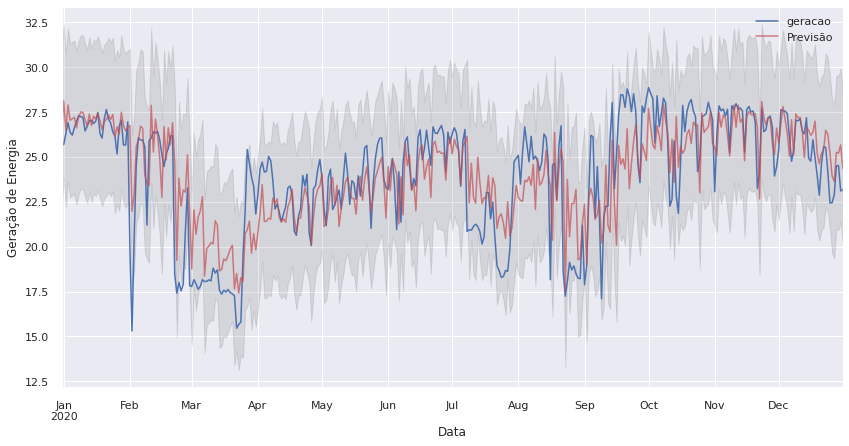

In [ ]:
ax = df_treino['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Geração de Energia')
plt.legend()
plt.show()

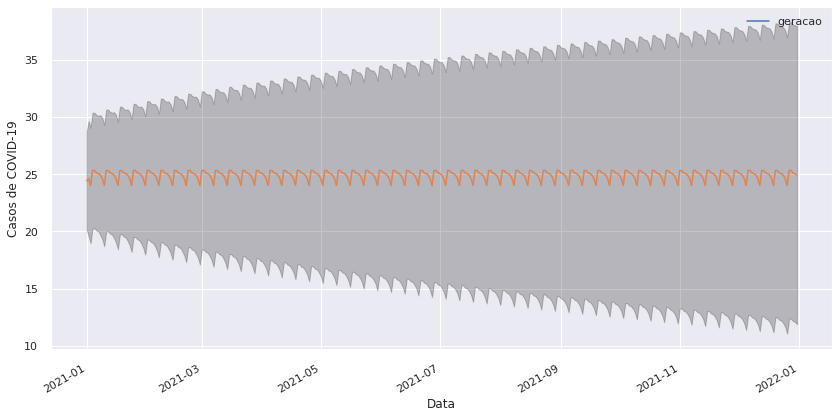

In [ ]:
pred_uc = results.get_forecast(steps=365)
pred_ic = pred_uc.conf_int()
ax = df_treino['2021':].plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1],color='k',alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.show()

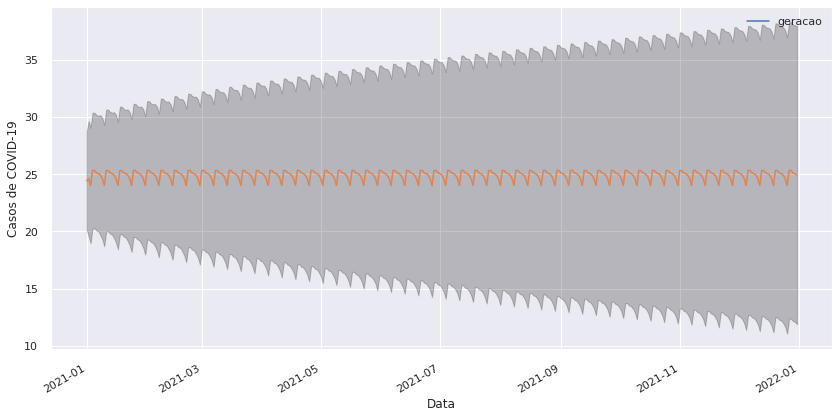

In [ ]:
pred_uc = results.get_forecast(steps=365)
pred_ic = pred_uc.conf_int()
ax = df_treino['2021':].plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1],color='k',alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.show()

In [ ]:
#from sklearn.metrics import r2_score
#test['predicted_sales'] = prediction
#r2_score(test['Champagne sales'], test['predicted_sales'])

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(data.geracao, data.Prediction)
RMSE=np.sqrt(MSE)
print ("RMSE = {:0.2f}". format(RMSE))


RMSE = 3.12


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [ ]:
MSE = mean_squared_error(data.geracao, data.Prediction)

In [ ]:
RMSE=np.sqrt(MSE)

In [ ]:
print ("RMSE = {:0.2f}". format(RMSE))

RMSE = 3.12


In [ ]:
y_true = df_teste['geracao']
y_pred = df_predict['y_pred']
from sklearn.metrics import mean_absolute_percentage_error
MAPE3=mean_absolute_percentage_error(y_true, y_pred)
print ("MAPE ARIMA = {:0.2f}%". format(MAPE3*100))

MAPE ARIMA = 10.64%


In [ ]:
#mae = mean_absolute_error(df_teste, forecast)
mape = mean_absolute_percentage_error(data.geracao, data.Prediction)
print('mape')

mape


### **x. teste**

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)

In [ ]:
model2= auto_arima  (df_treino, start_p=0, start_q=0, start_d=0, start_P=0, start_Q=0, start_D=0,
                    max_p=6, max_q=6,  max_d=6,                
                    max_P=6, max_D=6, max_Q=6, max_order=None, maxiter=10, alpha=0.05, #trend=True, #start_params=True,
                    m=7, d=0,  D=0,
                    test='adf',
                    seasonal=True,
                    seasonal_test_args=True,
                    trace=True, method='nm', 
                    error_action='ignore',suppress_warnings=True,
                    n_fits = 50, stepwise=None, random_state=20, information_criterion='aic' ) #

NameError: ignored

In [ ]:
model2

In [ ]:
print(model2.aic())

In [ ]:
model2.summary()

In [ ]:
previsao=model2.predict(n_periods=329)

In [ ]:
model2.fit(df_treino)

In [ ]:
previsao=pd.DataFrame(previsao,index=df_teste.index, columns=['previsão modelo 1'])
previsao

In [ ]:
plt.figure(figsize=(20,5))
pd.concat([df_teste,previsao],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.xlabel("Período", size=15)
plt.legend(['Valor real','previsão 1','previsão 2']);

### 4. Calculando a Média Movel e a Mediana

In [ ]:
df_treino

In [ ]:
#Média Movel Semana
#dfmm=df_pro.y.rolling(7).mean()
df['media']=df.geracao.rolling(365).mean()

In [ ]:
#Médiana Móvel
#dfsm=df_pro.y.rolling(7).std()
df['varianca']=df.geracao.rolling(365).var()

In [ ]:
df

In [ ]:
# Add traces
#https://plotly.com/python/line-charts/
#https://plotly.com/python/discrete-color/

#colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_treino.index, y=df_treino.geracao,
                    mode='lines', name='Dataframe Treino',line = {'color':'#3366CC' }))

fig.add_trace(go.Scatter(x=df_teste.index, y=df_teste.geracao,
                    mode='lines',name='Dataframe Teste',line = {'color': 'rgb(17,165,121)'}))
                    
fig.add_trace(go.Scatter(x=df.index, y=df['media'],
                    mode='lines',name='Média Móvel', line = {'color': '#F6222E', 'dash': 'dot'}))

fig.add_trace(go.Scatter(x=df.index, y=df['media'],
                    mode='lines',name='Média Móvel', line = {'color': '#F6222E', 'dash': 'dot'}))

fig.add_trace(go.Scatter(x=df.index, y=df['varianca'],
                    mode='lines',name='Variância', line = {'color': 'rgb(229,134,6)', 'dash': 'dot'}))

#fig.add_trace(go.Scatter(x=dft.index, y=dft['media1'],
#                    mode='lines',name='Variância', line = {'color': 'red'}))

# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração Diária de Energia (MWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

# Title 
fig.update_layout(title='Geração de Energia no Amazonas 2018 a 2021', title_x=0.5,title_y=0.93, plot_bgcolor = 'white',
font = {'family': 'Arial','size': 12,'color': 'black'},)

# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(autosize=True,width=900, height=600) #Salvando e exibindo o grafico 
#fig.write_image("grafico.png") 
#Salvando e exibindo o grafico 
fig.update_layout(autosize=True,width=1000, height=600)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

**Conclusão:**

Como você pode ver, a média móvel e o desvio padrão móvel aumentam com o tempo. Portanto, podemos concluir que a série temporal não é estacionária.

###**Teste de Stacionariedade: Dickey-Fuller**

Valores para aceitar ou não a serie como estacionária: 

Série é estacionária: 

1. ADF Statistic < Critical Value de 1%,5% 10% 
2. p-value < Critical Value de 1%,5% 10% 

Série NÃO é estacionária: 

3. ADF Statistic > Critical Value de 1%,5% 10% 
4. p-value > Critical Value de 1%,5% 10% 

p-valor > 0,05 : Falha ao rejeitar a hipótese nula (H0), os dados têm raiz unitária e **não são estacionários**.

p-value <= 0,05 : Rejeitar a hipótese nula (H0), os dados não têm raiz unitária e **são estacionários**.

In [ ]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['geracao'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

**O valore estatistico ADF é menor que os valores criticos em 5%, 10% a hipostese nula pode ser rejeitadad e a series pode ser estacionaria e o o p-value é menor que 0,05 o que tambem corrobora para a serie ser estacionariedade.**   


###**7. Teste Diferenciação**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
yt=df_treino.geracao


In [ ]:
ydi=yt.diff().dropna()
ydi

In [ ]:
yte1=df_teste.geracao

In [ ]:
yte=yte1.diff().dropna()
yte

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(yt.diff().dropna())

In [ ]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(ydi.diff().dropna(), autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

In [ ]:
resultados = seasonal_decompose(ydi, period=5)
resultados

In [ ]:
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.legend(fontsize=18)

In [ ]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade')

In [ ]:
plot_pacf(y.diff().dropna(),lags=40);

In [ ]:
#https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/
#https://www.kaggle.com/sadeght/arima-sarima-simple-clear-analysis
#https://medium.com/inflation-forecasting-using-sarimax-and-nkpc/plotting-monthly-inflation-over-the-selected-time-period-to-check-if-the-time-series-has-any-35e3b1fac761
model = auto_arima(ydi, start_p=0, start_q=0,  
                   start_P=0, 
                   test='adf',
                   max_p=8, max_q=8,
                   m=12,             
                   d=1,          
                   D=0,
                   #trend='ct',
                   seasonal=True,   
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

In [ ]:
print(model.aic())

In [ ]:
print(model.summary())

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()


In [ ]:
model.fit(ydi)

In [ ]:
future_forecast = model.predict(n_periods=328)
print(future_forecast)


In [ ]:
future_forecast = pd.DataFrame(future_forecast, index=yte.index, columns=['Prediction'])

In [ ]:
data=pd.concat([yte, future_forecast], axis=1)
#data.iplot(title="Energy Production Between Jan 1939 to May 2019")
data


In [ ]:
# Add traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.geracao,
                    mode='lines', name='Dataframe Treino'), )

fig.add_trace(go.Scatter(x=data.index, y=data.Prediction,
                    mode='lines',name='Dataframe Teste'))
#fig.add_trace(go.Scatter(x=dfmes_dt.index, y=dfmes_dt['variancia'],
#                    mode='lines',name='Variância', line = {'color': 'orange', 'dash': 'dot'}))
              
# Atualizando os eixos x
fig.update_xaxes( title_text = " Tempo", showgrid=True, gridwidth=1, gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Atualizando os eixos y
fig.update_yaxes( title_text = "Geração de Energia (MWh)", showgrid=True, gridwidth=1,   gridcolor='lightgray',showline=True, linewidth=1, linecolor='black')

# Adicionando o template
fig.update_layout(template = 'plotly_white') 
#legend
fig.update_layout(legend=dict(orientation="h", font = {'family': 'Arial','size': 10,'color': 'black'},
    yanchor="bottom", y=1, xanchor="right", x=0.9))

# Title 
fig.update_layout(title='Geração Diária de Energia no Amazonas 2013 a 2021', title_x=0.5,title_y=0.93, plot_bgcolor = 'white',
font = {'family': 'Arial','size': 12,'color': 'black'},)

# Menu com seleção de periodo de analise
#fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(autosize=True,width=1500, height=800)
#fig.write_image("grafico.png") 
#fig.write_html("grafico.html")
fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(data.geracao, data.Prediction)
RMSE=np.sqrt(MSE)
print ("RMSE = {:0.2f}". format(RMSE))

In [ ]:
modl = auto_arima(df_treino, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')


In [ ]:
preds, conf_int = modl.predict(n_periods=df_teste.shape[0], return_conf_int=True)

In [ ]:
# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(df_teste, preds)))

In [ ]:
x_axis = np.arange(df_treino.shape[0] + preds.shape[0])
x_years = x_axis + 2018  # Year starts at 1821

plt.plot(x_years[x_axis[:df_treino.shape[0]]], df_treino, alpha=0.75)
plt.plot(x_years[x_axis[df_treino.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[df_treino.shape[0]:]], df_teste,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Lynx forecasts")
plt.xlabel("Year")